#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

#### Loading the dataset

In [2]:
data = pd.read_excel(r"D:\ICTAK\Assignments and Case Studies\Assignment 05\iris.xls")

#### Displaying the head of the dataset

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Getting the shape of the dataset

In [4]:
data.shape

(150, 5)

#### Getting the info of the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Displaying the statistical summary of the dataset

In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Finding the null values in the dataset

In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

##### <font color = violet> There are null values in 3 columns.

#### Displaying the distribution of columns that have null values

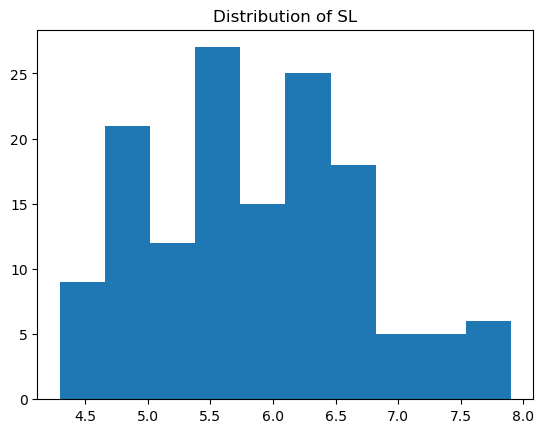

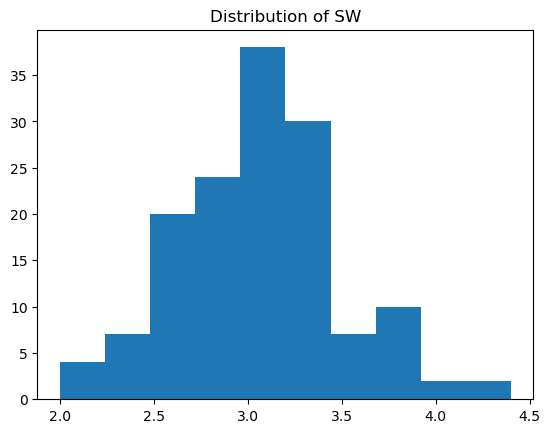

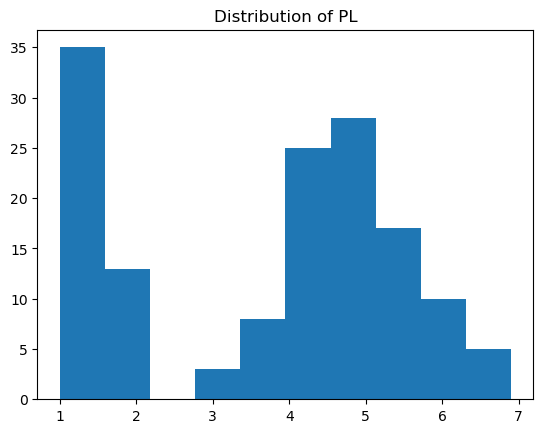

In [8]:
for i in ['SL', 'SW', 'PL']:
    plt.hist(data[i])
    plt.title('Distribution of {}'.format(i))
    plt.show()

##### <font color = violet> We can see that the columns "SL" and "PL" are right skewed, and the column "SW" is close to normally disributed. So we can fill the null values in the columns "SL" and "PL" by their medians, and in the column "SW" by its mean.

#### Filling the null values of the columns "SL" and "PL"

In [9]:
for j in ['SL', 'PL']:
    data[j].fillna(data[j].median(), inplace = True)

#### Filling the null values of the column "SW"

In [10]:
data['SW'].fillna(data['SW'].mean(), inplace = True)

#### Finding whether there is any more null values in the dataset

In [11]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

#### Finding outliers in the numerical columns using boxplot graph

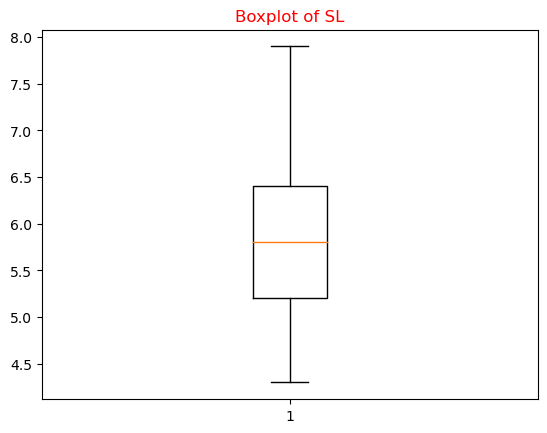

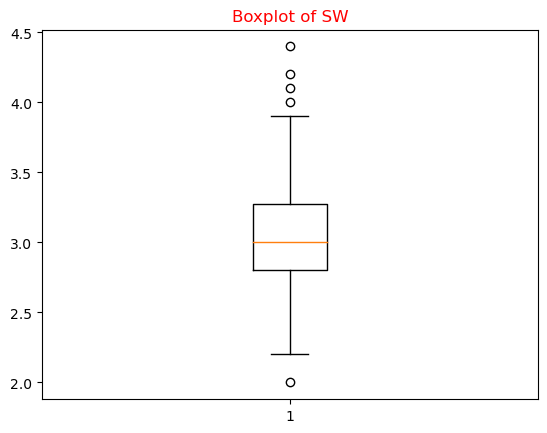

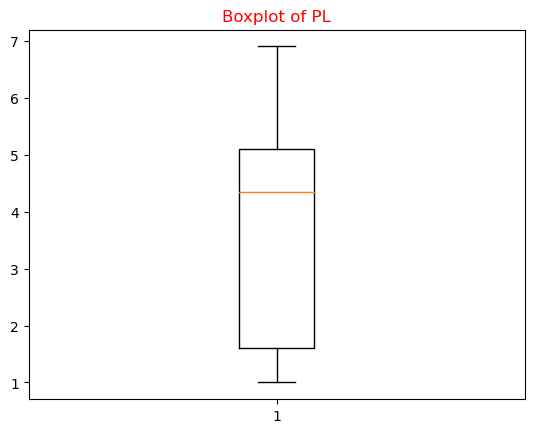

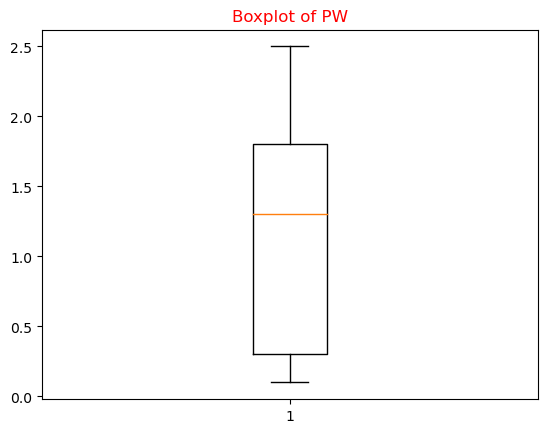

In [12]:
num_col = data.select_dtypes(include = 'float')
for col in num_col:
    plt.figure()
    plt.boxplot(data[col])
    plt.title('Boxplot of {}'.format(col), color = 'r')
    plt.show()

##### <font color = violet> There are outliers in the column "SW".

#### Finding number of outliers in the column "SW"

In [13]:
Q1 = data['SW'].quantile(0.25)
Q3 = data['SW'].quantile(0.75)
IQR = Q3 - Q1
low = Q1 - (1.5 * IQR)
upp = Q3 + (1.5 * IQR)
outliers = []
for x in data['SW']:
    if(x > upp) or (x < low):
        outliers.append(x)
len(outliers)

5

#### Flooring and Capping the outliers in the column "SW"

In [14]:
data['SW'] = np.where(data['SW'] > upp, upp, np.where(data['SW'] < low, low, data['SW']))

#### Setting the feature and the target variables

In [15]:
x = data.drop('Classification', axis = 1)
y = data['Classification']

### <font color = brown> Logistic Regression

#### Importing Logistic Regression from sklearn

In [16]:
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 50)

#### Importing train_test_split, accuracy_score, precision_score, recall_score, f1_score and confusion_matrix

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#### Splitting the dataset into training and testing sets

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 25)

#### Defining a logistic regression function

In [19]:
def logisticregression(x,y):
    logic.fit(x_train, y_train)
    y_pred = logic.predict(x_test)
    print('Accuracy =', accuracy_score(y_test, y_pred))
    print('Precision =', precision_score(y_test, y_pred, average = 'micro'))
    print('Recall =', recall_score(y_test, y_pred, average = 'micro'))
    print('F1 Score =', f1_score(y_test, y_pred, average = 'micro'))
    print('Confusion Matrix is\n', confusion_matrix(y_test, y_pred))

#### Calling the logistic regression function

In [20]:
logisticregression(x, y)

Accuracy = 0.9210526315789473
Precision = 0.9210526315789473
Recall = 0.9210526315789473
F1 Score = 0.9210526315789473
Confusion Matrix is
 [[ 9  2  0]
 [ 0 15  1]
 [ 0  0 11]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### <font color = brown> k Nearest Neighbor

#### Import KNeighborsClassifiers

In [21]:
from sklearn.neighbors import KNeighborsClassifier

#### Defining a function to find k nearest neighbor with highest accuracy_score

In [22]:
def knnhighaccuracy(x,y):
    metric = []
    neighbors = np.arange(3,15)
    acc = 0
    for k in neighbors:
        classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
        classifier.fit(x_train, y_train)
        y_pred_knn = classifier.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred_knn)
        if acc < accuracy:
            acc = accuracy
            k_high = k
        metric.append(accuracy)
    plt.plot(neighbors,metric,'o-')
    plt.xlabel('k value')
    plt.ylabel('accuracy')
    plt.grid()
    plt.show()
    return x_train, x_test, y_train, y_test, k_high

#### Calling the knnhighaccuracy function

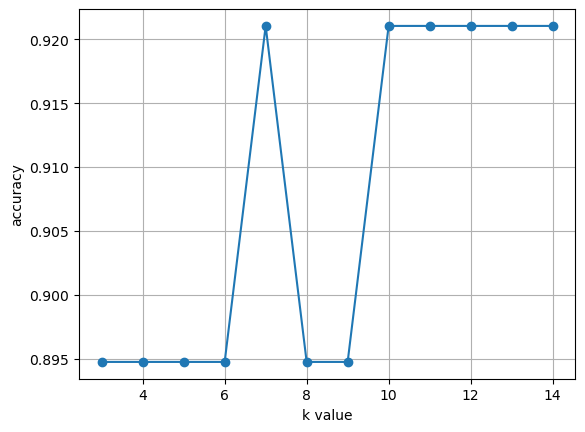

In [23]:
x_train1, x_test1, y_train1, y_test1, k_high1 = knnhighaccuracy(x,y)

#### Finding the k nearest neighbor value with highest accuracy

In [24]:
k_high1

7

##### <font color = violet> There are more than one k value with highest accuracy. So we take the least among them.

#### Defining a function to calculate the accuracy of highest k nearest neighbor

In [25]:
def knn(x_train, x_test, y_train, y_test, k_high):
    classifier = KNeighborsClassifier(n_neighbors = k_high, metric = 'minkowski', p = 2)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    print('Accuracy =', accuracy_score(y_test, y_pred))
    print('Precision =', precision_score(y_test, y_pred, average = 'micro'))
    print('Recall =', recall_score(y_test, y_pred, average = 'micro'))
    print('F1 Score =', f1_score(y_test, y_pred, average = 'micro'))
    print('Confusion Matrix is\n', confusion_matrix(y_test, y_pred))

#### Calling the knn function

In [26]:
knn(x_train1, x_test1, y_train1, y_test1, k_high1)

Accuracy = 0.9210526315789473
Precision = 0.9210526315789473
Recall = 0.9210526315789473
F1 Score = 0.9210526315789473
Confusion Matrix is
 [[ 9  2  0]
 [ 0 15  1]
 [ 0  0 11]]


### <font color = brown> SVM Model

#### Importing SVC from sklearn

In [27]:
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')

#### Defining a function for SVM model 

In [28]:
def svmmodel(x,y):
    svmclf.fit(x_train, y_train)
    y_pred = svmclf.predict(x_test)
    print('Accuracy =', accuracy_score(y_test, y_pred))
    print('Confusion Matrix is\n', confusion_matrix(y_test, y_pred))

#### Calling the svmmodel fuction

In [29]:
svmmodel(x,y)

Accuracy = 0.9210526315789473
Confusion Matrix is
 [[ 9  2  0]
 [ 0 15  1]
 [ 0  0 11]]


### <font color = brown> Decision Tree

#### Importing Decision Tree from sklearn

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

#### Defining a function for Decision Tree

In [31]:
def decisiontree(x,y):
    dt_clf.fit(x_train, y_train)
    y_pred = dt_clf.predict(x_test)
    print('Accuracy =', accuracy_score(y_test, y_pred))
    print('Confusion Matrix is\n', confusion_matrix(y_test, y_pred))

#### Calling the decisiontree fuction

In [32]:
decisiontree(x,y)

Accuracy = 0.9473684210526315
Confusion Matrix is
 [[11  0  0]
 [ 0 15  1]
 [ 0  1 10]]


### <font color = brown> Random Forest

#### Importing Random Forest from sklearn

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

#### Defining a function for Random Forest

In [37]:
def randomforest(x,y):
    rf_clf.fit(x_train, y_train)
    y_pred = rf_clf.predict(x_test)
    print('Accuracy =', accuracy_score(y_test, y_pred))
    print('Confusion Matrix is\n', confusion_matrix(y_test, y_pred))

#### Calling the randomforest fuction

In [38]:
randomforest(x,y)

Accuracy = 0.9473684210526315
Confusion Matrix is
 [[11  0  0]
 [ 0 15  1]
 [ 0  1 10]]


#### <font color = violet> The values in all the  features in the dataset have similar magnitudes and ranges, so scaling is not typically required. 

### <font color = red> We can see that the decision tree and random forest models have highest accuracy among the classification models. So they could give best prediction result for the dataset.